**MAX VOTING AVERAGING & WEIGHTED AVERAGE VOTING (Classification)**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [57]:
x,y = make_moons(n_samples=1000, noise=0.2)

In [58]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [59]:
dataset = pd.DataFrame(df)

In [60]:
dataset.head()

,x1,x2,y
0,1.960632,0.047625,1
1,0.331148,0.456047,1
2,1.226332,-0.636513,1
3,0.134521,1.074770,0
4,-0.871532,0.440927,0


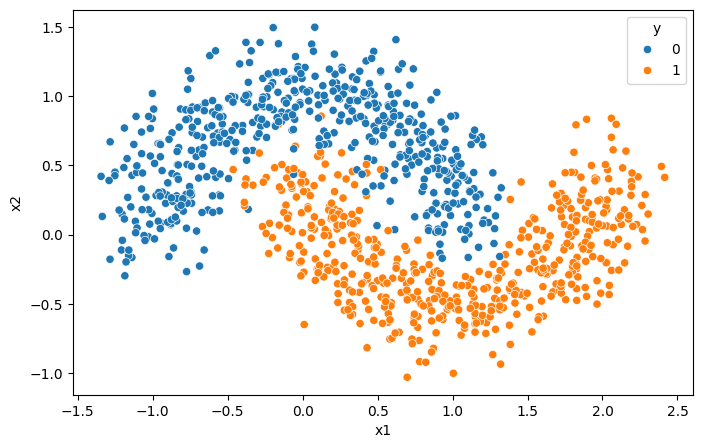

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="x1",y="x2",hue="y",data=dataset)
plt.show()

In [62]:
x_a = dataset.drop("y",axis=1)
y_a = dataset["y"]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [66]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100,dt.score(x_train,y_train)*100

(97.0, 100.0)

In [67]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)*100,sv.score(x_train,y_train)*100


(97.5, 97.375)

In [68]:
gb = GaussianNB()
gb.fit(x_train,y_train)
gb.score(x_test,y_test)*100,gb.score(x_train,y_train)*100

(87.5, 86.375)

In [69]:
li = [("dt1",dt),("sv1",sv),("gb1",gb)]

In [70]:
from sklearn.ensemble import VotingClassifier

In [71]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)


VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gb1', GaussianNB())])

In [72]:
vc.score(x_test,y_test)*100,vc.score(x_train,y_train)*100

(97.0, 97.75)

In [75]:
prd = {"dt":dt.predict(x_test),"sv":sv.predict(x_test),"gb":gb.predict(x_test),"vc": vc.predict(x_test)}

In [76]:
pd.DataFrame(prd)

,dt,sv,gb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,0,1
4,1,1,1,1
...,...,...,...,...
195,1,1,1,1
196,1,0,0,0
197,1,1,1,1
198,0,0,0,0
